In [5]:
import numpy as np
import matplotlib.pyplot as plt

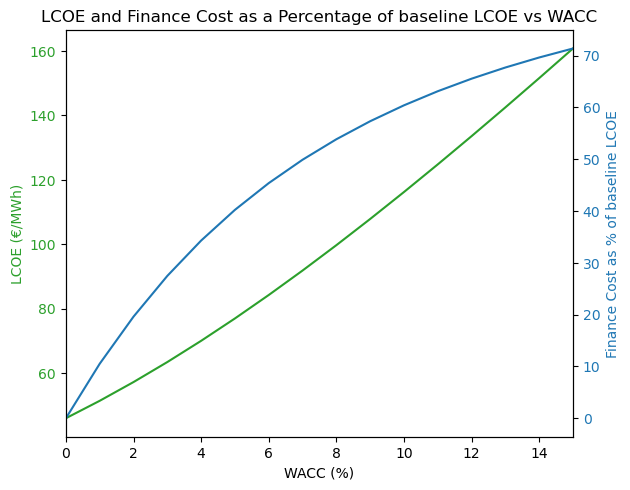

([46.0,
  51.40675340054803,
  57.22043841739471,
  63.427871039127815,
  70.01196278645466,
  76.95245729922968,
  84.22671821227404,
  91.81051722066567,
  99.67877905196816,
  107.80625051857186,
  116.16807219002094,
  124.74024205405574,
  133.49996980950792,
  142.42592760257568,
  151.49840793724456,
  160.69940232020636],
 [0.0,
  10.51759359012621,
  19.609144438123977,
  27.476676662183397,
  34.29694273776352,
  40.22283158401431,
  45.38550120869294,
  49.89680769422151,
  53.85176219301642,
  57.33085996523407,
  60.40220076583876,
  63.123368014577,
  65.54306336875003,
  67.70250980681124,
  69.63664461803806,
  71.37512689167235])

In [25]:
# Adjusted function to calculate the LCOE
def adjusted_calculate_LCOE(It, Mt, Ft, Et, r, n):
    # Calculate the present value of costs each year (recurring costs included each year)
    costs_pv = sum([(It if t == 1 else 0) + Mt / ((1 + r)**t) + Ft / ((1 + r)**t) for t in range(1, n+1)])
    # Calculate the present value of energy generation each year
    energy_pv = sum([Et / ((1 + r)**t) for t in range(1, n+1)])
    # Calculate LCOE as the ratio of the total present value of costs to the total present value of energy
    lcoe = costs_pv / energy_pv
    return lcoe

# Extending the WACC range from 0% to 15%
extended_wacc_rates = np.linspace(0.00, 0.15, 16)

# Updated values assuming total expenditures in euros, not per MWh
total_investment = 50000000  # Total investment expenditures (It) in €
annual_operations_maintenance = 200000  # Annual operations and maintenance expenditures (Mt) in €/year
annual_fixed_expenditures = 100000  # Annual fixed expenditures (Ft) in €/year
annual_electricity_generation = 50000  # Annual electricity generation (Et) in MWh
life_of_system = 25  # Life of the system (n) in years

# Calculate the LCOE for each WACC value
extended_lcoe_values = [adjusted_calculate_LCOE(total_investment, 
                                                annual_operations_maintenance, 
                                                annual_fixed_expenditures, 
                                                annual_electricity_generation, 
                                                wacc, 
                                                life_of_system) for wacc in extended_wacc_rates]

# Calculate the baseline LCOE (at 0% WACC)
baseline_lcoe = extended_lcoe_values[0]

# Calculate the finance costs as a percentage of the baseline LCOE
extended_finance_costs = [((extended_lcoe_values[index]-baseline_lcoe) / extended_lcoe_values[index]) * 100 for index, wacc in enumerate(extended_wacc_rates)]

# Plot the graph
fig, ax1 = plt.subplots()

# First axis for LCOE
color = 'tab:green'
ax1.set_xlabel('WACC (%)')
ax1.set_ylabel('LCOE (€/MWh)', color=color)
ax1.plot(extended_wacc_rates * 100, extended_lcoe_values, color=color)  # WACC rates are multiplied by 100 to convert to percentage
ax1.tick_params(axis='y', labelcolor=color)

# Second axis for Finance Cost as % of baseline LCOE
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Finance Cost as % of baseline LCOE', color=color)
ax2.plot(extended_wacc_rates * 100, extended_finance_costs, color=color)  # WACC rates are multiplied by 100 to convert to percentage
ax2.tick_params(axis='y', labelcolor=color)

# Ensure the x-axis has proportional values for the extended WACC range
ax1.set_xlim(0, 15)
ax2.set_xlim(0, 15)

fig.tight_layout()
plt.title('LCOE and Finance Cost as a Percentage of baseline LCOE vs WACC')
plt.show()

extended_lcoe_values, extended_finance_costs

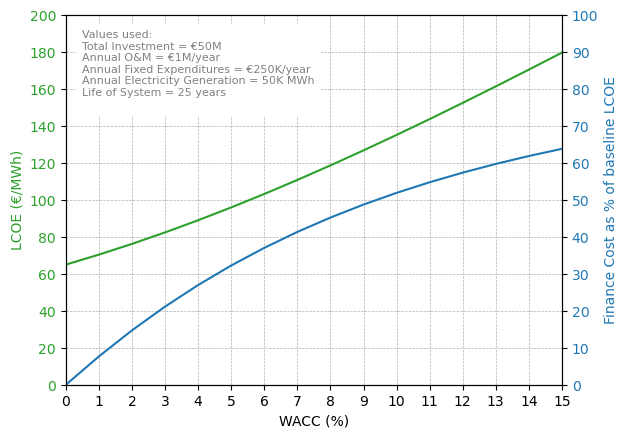

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Adjusted function to calculate the LCOE
def adjusted_calculate_LCOE(It, Mt, Ft, Et, r, n):
    # Calculate the present value of costs each year (recurring costs included each year)
    costs_pv = sum([(It if t == 1 else 0) + Mt / ((1 + r)**t) + Ft / ((1 + r)**t) for t in range(1, n+1)])
    # Calculate the present value of energy generation each year
    energy_pv = sum([Et / ((1 + r)**t) for t in range(1, n+1)])
    # Calculate LCOE as the ratio of the total present value of costs to the total present value of energy
    lcoe = costs_pv / energy_pv
    return lcoe

# Extending the WACC range from 0% to 15%
extended_wacc_rates = np.linspace(0.00, 0.15, 16)

# Updated values assuming total expenditures in euros, not per MWh
total_investment = 50000000  # Total investment expenditures (It) in €
annual_operations_maintenance = 1000000  # Annual operations and maintenance expenditures (Mt) in €/year
annual_fixed_expenditures = 250000  # Annual fixed expenditures (Ft) in €/year
annual_electricity_generation = 50000  # Annual electricity generation (Et) in MWh
life_of_system = 25  # Life of the system (n) in years

# Calculate the LCOE for each WACC value
extended_lcoe_values = [adjusted_calculate_LCOE(total_investment, 
                                                annual_operations_maintenance, 
                                                annual_fixed_expenditures, 
                                                annual_electricity_generation, 
                                                wacc, 
                                                life_of_system) for wacc in extended_wacc_rates]

# Calculate the baseline LCOE (at 0% WACC)
baseline_lcoe = extended_lcoe_values[0]

# Calculate the finance costs as a percentage of the baseline LCOE
extended_finance_costs = [((extended_lcoe_values[index]-baseline_lcoe) / extended_lcoe_values[index]) * 100 for index, wacc in enumerate(extended_wacc_rates)]

# Plot the graph
fig, ax1 = plt.subplots()

# First axis for LCOE
color = 'tab:green'
ax1.set_xlabel('WACC (%)')
ax1.set_ylabel('LCOE (€/MWh)', color=color)
ax1.plot(extended_wacc_rates * 100, extended_lcoe_values, color=color)  # WACC rates are multiplied by 100 to convert to percentage
ax1.tick_params(axis='y', labelcolor=color)

# Second axis for Finance Cost as % of baseline LCOE
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Finance Cost as % of baseline LCOE', color=color)
ax2.plot(extended_wacc_rates * 100, extended_finance_costs, color=color)  # WACC rates are multiplied by 100 to convert to percentage
ax2.tick_params(axis='y', labelcolor=color)

# Ensure the x-axis has proportional values for the extended WACC range
ax1.set_xlim(0, 15)
ax1.set_ylim(0,200)
ax2.set_ylim(0,100)
ax1.xaxis.set_major_locator(plt.MultipleLocator(1))
ax1.yaxis.set_major_locator(plt.MultipleLocator(20))
ax2.yaxis.set_major_locator(plt.MultipleLocator(10))

# Add grid
ax1.grid(which='both', linestyle='--', linewidth=0.5)

caption = (
    "Values used:\n"
    "Total Investment = €50M\n"
    "Annual O&M = €1M/year\n"
    "Annual Fixed Expenditures = €250K/year\n"
    "Annual Electricity Generation = 50K MWh\n"
    "Life of System = 25 years\n"
)

# Place the caption on the left side of the graph
fig.text(0.15, 0.85, caption, ha='left', va='top', fontsize=8, color='gray', backgroundcolor = 'white')

# Remove title
plt.title('')

# Save the graph
plt.savefig('../results/wacc_lcoe.pdf', bbox_inches='tight')

plt.show()
